In [ ]:
import random
import time
import tracemalloc
import matplotlib.pyplot as plt
from random import sample

In [2]:
def countingSortForRadix(inputArray, placeValue):
    # We can assume that the number of digits used to represent
    # all numbers on the placeValue position is not grater than 10
    countArray = [0] * 10
    inputSize = len(inputArray)

    # placeElement is the value of the current place value
    # of the current element, e.g. if the current element is
    # 123, and the place value is 10, the placeElement is
    # equal to 2
    for i in range(inputSize): 
        placeElement = (inputArray[i] // placeValue) % 10
        countArray[placeElement] += 1

    for i in range(1, 10):
        countArray[i] += countArray[i-1]

    # Reconstructing the output array
    outputArray = [0] * inputSize
    i = inputSize - 1
    while i >= 0:
        currentEl = inputArray[i]
        placeElement = (inputArray[i] // placeValue) % 10
        countArray[placeElement] -= 1
        newPosition = countArray[placeElement]
        outputArray[newPosition] = currentEl
        i -= 1
        
    return outputArray

def radixSort(inputArray):
    # Step 1 -> Find the maximum element in the input array
    maxEl = max(inputArray)

    # Step 2 -> Find the number of digits in the `max` element
    D = 1
    while maxEl > 0:
        maxEl /= 10
        D += 1
    
    # Step 3 -> Initialize the place value to the least significant place
    placeVal = 1

    # Step 4
    outputArray = inputArray
    while D > 0:
        outputArray = countingSortForRadix(outputArray, placeVal)
        placeVal *= 10  
        D -= 1

    return outputArray

In [3]:
def complexity(data):
    start = time.time()
    tracemalloc.start()
    radixSort(data)
    end = time.time()
    runtime = end - start
    current, peak = tracemalloc.get_traced_memory()
    usage = current / 10**6
    print(f"Current memory usage is {usage}MB") #; Peak was {peak / 10**6}MB")
    tracemalloc.stop()
    print(f"Runtime is {runtime}")
    return usage, runtime

In [4]:
random.seed(1)
sequence = [i for i in range(100000)]
random.shuffle(sequence)

In [5]:
subsequence = sample(sequence, 50)
usage1, runtime1 = complexity(subsequence)
subsequence = sorted(subsequence)
bestUsage1, bestRuntime1 = complexity(subsequence)
subsequence = sorted(subsequence, reverse=True)
worstUsage1, worstRuntime1 = complexity(subsequence)

Current memory usage is 0.00192MB
Runtime is 0.009965658187866211
Current memory usage is 0.0MB
Runtime is 0.0069789886474609375
Current memory usage is 2.4e-05MB
Runtime is 0.00804281234741211


In [6]:
subsequence = sample(sequence, 100)
usage2, runtime2 = complexity(subsequence)
subsequence = sorted(subsequence)
bestUsage2, bestRuntime2 = complexity(subsequence)
subsequence = sorted(subsequence, reverse=True)
worstUsage2, worstRuntime2 = complexity(subsequence)

Current memory usage is 0.000196MB
Runtime is 0.0129852294921875
Current memory usage is 0.0MB
Runtime is 0.011427879333496094
Current memory usage is 0.000152MB
Runtime is 0.012899398803710938


In [7]:
subsequence = sample(sequence, 200)
usage3, runtime3 = complexity(subsequence)
subsequence = sorted(subsequence)
bestUsage3, bestRuntime3 = complexity(subsequence)
subsequence = sorted(subsequence, reverse=True)
worstUsage3, worstRuntime3 = complexity(subsequence)

Current memory usage is 0.000908MB
Runtime is 0.02292323112487793
Current memory usage is 0.000152MB
Runtime is 0.022922515869140625
Current memory usage is 0.000152MB
Runtime is 0.022547483444213867


In [8]:
subsequence = sample(sequence, 500)
usage4, runtime4 = complexity(subsequence)
subsequence = sorted(subsequence)
bestUsage4, bestRuntime4 = complexity(subsequence)
subsequence = sorted(subsequence, reverse=True)
worstUsage4, worstRuntime4 = complexity(subsequence)

Current memory usage is 0.005634MB
Runtime is 0.27511119842529297
Current memory usage is 0.006413MB
Runtime is 0.2805027961730957
Current memory usage is 0.007876MB
Runtime is 0.280963659286499


In [9]:
subsequence = sample(sequence, 1000)
usage5, runtime5 = complexity(subsequence)
subsequence = sorted(subsequence)
bestUsage5, bestRuntime5 = complexity(subsequence)
subsequence = sorted(subsequence, reverse=True)
worstUsage5, worstRuntime5 = complexity(subsequence)

Current memory usage is 0.005834MB
Runtime is 0.8021395206451416
Current memory usage is 0.005438MB
Runtime is 0.8243181705474854
Current memory usage is 0.005414MB
Runtime is 0.8851842880249023


In [10]:
subsequence = sample(sequence, 2000)
usage6, runtime6 = complexity(subsequence)
subsequence = sorted(subsequence)
bestUsage6, bestRuntime6 = complexity(subsequence)
subsequence = sorted(subsequence, reverse=True)
worstUsage6, worstRuntime6 = complexity(subsequence)

Current memory usage is 0.00577MB
Runtime is 1.9719839096069336
Current memory usage is 0.005438MB
Runtime is 1.9274418354034424
Current memory usage is 0.005414MB
Runtime is 1.8631303310394287


In [11]:
subsequence = sample(sequence, 5000)
usage7, runtime7 = complexity(subsequence)
subsequence = sorted(subsequence)
bestUsage7, bestRuntime7 = complexity(subsequence)
subsequence = sorted(subsequence, reverse=True)
worstUsage7, worstRuntime7 = complexity(subsequence)

Current memory usage is 0.00609MB
Runtime is 4.950315475463867
Current memory usage is 0.006046MB
Runtime is 4.856465101242065
Current memory usage is 0.005414MB
Runtime is 4.958991050720215


In [12]:
subsequence = sample(sequence, 10000)
usage8, runtime8 = complexity(subsequence)
subsequence = sorted(subsequence)
bestUsage8, bestRuntime8 = complexity(subsequence)
subsequence = sorted(subsequence, reverse=True)
worstUsage8, worstRuntime8 = complexity(subsequence)

Current memory usage is 0.005506MB
Runtime is 9.817589282989502
Current memory usage is 0.005438MB
Runtime is 9.822448492050171
Current memory usage is 0.005414MB
Runtime is 9.882498264312744


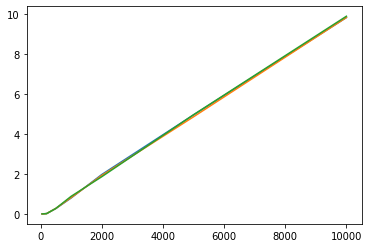

In [13]:
plt.plot([50,100,200,500, 1000, 2000, 5000, 10000],[ runtime1,runtime2,runtime3,runtime4,runtime5,runtime6,runtime7,runtime8])
plt.plot([50,100,200,500, 1000, 2000, 5000, 10000],[ bestRuntime1,bestRuntime2,bestRuntime3,bestRuntime4,bestRuntime5,bestRuntime6,bestRuntime7,bestRuntime8])
plt.plot([50,100,200,500, 1000, 2000, 5000, 10000],[ worstRuntime1,worstRuntime2,worstRuntime3,worstRuntime4,worstRuntime5,worstRuntime6,worstRuntime7,worstRuntime8,])

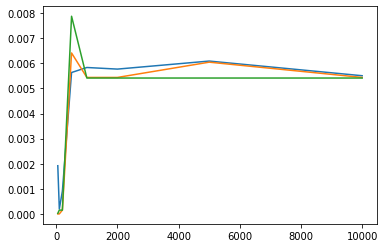

In [14]:
plt.plot([50,100,200,500, 1000, 2000, 5000, 10000],[ usage1,usage2,usage3,usage4,usage5,usage6,usage7,usage8,])
plt.plot([50,100,200,500, 1000, 2000, 5000, 10000],[ bestUsage1,bestUsage2,bestUsage3,bestUsage4,bestUsage5,bestUsage6,bestUsage7,bestUsage8,])
plt.plot([50,100,200,500, 1000, 2000, 5000, 10000],[worstUsage1,worstUsage2,worstUsage3,worstUsage4,worstUsage5,worstUsage6,worstUsage7,worstUsage8,])